In [1]:
setprecision(7100);

In [2]:
function Wfile(A,Times,figure)
    if figure == 1
        XLSX.openxlsx("LorenzF_J.xlsx", mode="w") do xf
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
        sheet["A1"] = "X"
        sheet["B1"] = "Y"
        sheet["C1"] = "Z"
        str1="A2:C"*string(Times+1)
        sheet[str1] = A
        end
    else
        XLSX.openxlsx("LorenzF_J.xlsx", mode="rw") do xf
        sheet = xf[1]
        str2="A"*string((figure-1)*Times+2)*":C"*string(figure*Times+1)
        sheet[str2] = A 
        end
    end        
end

Wfile (generic function with 1 method)

In [3]:
function accuracy(t)
    e = ep*exp(BigFloat(2.3025851)*(BigFloat(0.4)*t-BigFloat(20)))
    ac = (0.29803-log10(e))/0.30103;
    return max(round(Int,ac),128);
end

accuracy (generic function with 1 method)

In [4]:
function order()
    M=400;
    return M+1;
end

order (generic function with 1 method)

In [5]:
function Ep(t)
    return ep*exp(BigFloat(2.3025851)*(BigFloat(0.4)*t-BigFloat(10)))
end

Ep (generic function with 1 method)

In [6]:
function steps(Dfm,Co)
    h = Co*abs(Dfm)^(BigFloat(-1)/BigFloat(order()-1))
    return min(h,BigFloat(1)/BigFloat(10))
end

steps (generic function with 1 method)

In [7]:
function goonm(mor)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (sgo)^(BigFloat(1)/BigFloat(mor))
end 

goonm (generic function with 1 method)

In [8]:
function goon(mor,ep)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (ep*sgo)^(BigFloat(1)/BigFloat(mor))
end 

goon (generic function with 1 method)

In [9]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [10]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [11]:
function multi(hstep)
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*hstep/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [12]:
function Sumxyz(k,x,y,Cki)
    s = sum(Cki[k+1,1:k+1].*reverse!(x).*y)
    return s
end 

Sumxyz (generic function with 1 method)

In [13]:
function Talor(x,y,z,Cki,Co)
    for k in 1:order()-1
        x[k+1] = c*(-x[k] + y[k])
        y[k+1] = R*x[k] - y[k] - Sumxyz(k-1,x[1:k],z[1:k],Cki)
        z[k+1] = Sumxyz(k-1,x[1:k],y[1:k],Cki) - b*z[k]
    end
    return [x,y,z],min(steps(x[end],Co),steps(y[end],Co),steps(z[end],Co))
end

Talor (generic function with 1 method)

In [14]:
function Iteration(x,y,z,Times,Cki,Lorenz,Tin,Tinf)
    stl = 0;
    flag = 0;
    for st in 1:Times
        
        Co = Mo*Ep(Tin)^(BigFloat(1)/BigFloat(order()))
        setprecision(accuracy(Tin))
        
        Tay,hstep = Talor(x,y,z,Cki,Co)

        if Tin + hstep < Tinf 
            x = Tay[1]
            y = Tay[2]
            z = Tay[3]
            Dmulti = multi(hstep);
        
            x[1] = sum(Dmulti[1:order()].*x[1:order()]);
            y[1] = sum(Dmulti[1:order()].*y[1:order()]);
            z[1] = sum(Dmulti[1:order()].*z[1:order()]);
    
            Lorenz[st,:] = [x[1],y[1],z[1]]; 
            
            Tin = Tin + hstep
            stl = st
        else
            hstep = Tinf - Tin
            x = Tay[1]
            y = Tay[2]
            z = Tay[3]
            Dmulti = multi(hstep);
        
            x[1] = sum(Dmulti[1:order()].*x[1:order()]);
            y[1] = sum(Dmulti[1:order()].*y[1:order()]);
            z[1] = sum(Dmulti[1:order()].*z[1:order()]);
    
            Lorenz[st,:] = [x[1],y[1],z[1]]; 
            Tin = Tin + hstep
            stl = st
            flag = 1
            break;
        end
           
    end
    
    Times2 = stl
    return Lorenz,Tin,Times2,flag
    
end

Iteration (generic function with 1 method)

In [15]:
function Lmain(x,y,z,Times,Cki,Maxi,Lorenz,Tin,Tinf)
    Times2 = 0;
    for i in 1:Maxi
    
        Lorenz,Tin,Times2,flag = Iteration(x,y,z,Times,Cki,Lorenz,Tin,Tinf)
    
        x[1] = Lorenz[end,1]
        y[1] = Lorenz[end,2]
        z[1] = Lorenz[end,3]
    
        Lorenzf = convert.(Float32,Lorenz)
        Lorenztol[Times*(i-1)+1:Times*(i-1)+Times2,:] = Lorenzf[1:Times2,:]
    
        println(i,")","LTU=",convert.(Float16,Tin),": ",Lorenzf[Times2,:]," (Ep: ",convert(Float16,log10(abs(Ep(Tin)))),") (Mp: ",accuracy(Tin),")")
        #println(convert.(Float16,Tin))       
        if flag == 1 
            break;
        end
    end
    return Lorenztol,Times2
end

Lmain (generic function with 1 method)

In [16]:
#defining
using XLSX

Tin = BigFloat(0);
Tinf = BigFloat(1200);
Times = 250;     #attension to use steps
Maxi = 500;             #tatol time = Max * Times(down)

ep = BigFloat(10)^BigFloat(-500);
Mo = goonm(order())
#Co = goon(order()-1,ep)

c = BigFloat(10);
R = BigFloat(28) #+ BigFloat(1)/BigFloat(2);
b = BigFloat(8)/BigFloat(3);

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
x[1] = BigFloat(-15) - BigFloat(8)/BigFloat(10); 
y[1] = BigFloat(-17) - BigFloat(48)/BigFloat(100); 
z[1] = BigFloat(35) + BigFloat(64)/BigFloat(100);

Lorenz = Array{BigFloat}(undef,Times,3);
Lorenzf = Array{Float32}(undef,Times,3);
Lorenztol = Array{Float32}(undef,Times*Maxi,3);
Cki = Array{BigFloat}(undef,order()-1,order()-1);
Dmulti = Array{BigFloat}(undef,1,order());

Cki = DJCh();

In [17]:
#Main 
Lorenztol,Times2 = Lmain(x,y,z,Times,Cki,Maxi,Lorenz,Tin,Tinf);

3.303
6.77
10.31
14.02
17.44
20.95
24.34
27.97
31.6
35.1
38.78
42.47
46.16
50.0
53.8
57.62
61.44
65.4
69.25
73.3
77.25
81.4
85.44
89.56
93.75
98.2
103.0
107.44
111.6
116.06
120.56
125.0
129.5
134.0
138.6
143.1
147.8
152.5
157.2
162.1
167.1
172.5
177.5
182.6
187.8
193.0
198.2
203.4
209.1
214.6
220.4
226.8
232.6
238.1
244.0
249.9
256.0
262.2
268.5
274.5
281.2
287.5
294.2
301.0
307.8
314.8
321.8
328.8
336.0
343.5
351.0
358.5
366.2
374.2
382.2
390.8
399.0
407.5
416.2
425.0
434.5
444.0
453.8
463.8
474.0
484.2
495.0
505.8
516.5
527.5
539.0
551.0
563.5
576.0
589.0
603.0
617.0
631.0
646.0
662.0
678.0
695.5
712.5
730.0
748.0
767.0
787.0
807.5
828.5
850.0
872.0
894.5
918.0
941.5
966.0
990.5
1.015e3
1.04e3
1.065e3
1.09e3
1.115e3
1.14e3
1.165e3
1.19e3
1.2e3


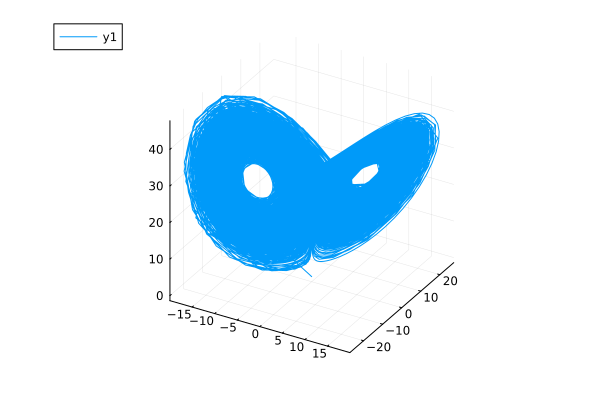

In [18]:
#drawing
using Plots; 
plot(Lorenztol[1:Times*(Maxi-1)+Times2,1],Lorenztol[1:Times*(Maxi-1)+Times2,2],Lorenztol[1:Times*(Maxi-1)+Times2,3])

In [19]:
plot(1:Times*Maxi,Lorenztol[:,1])

In [20]:
#=output
Lorenztol[end,:]
=#

In [21]:
#=profiling
using ProfileView
@profview Lmain(x,y,z,Times,Cki,Maxi,Lorenz);
=#

In [22]:
function jiecheng(nn)
    ss = BigFloat(1)
    for i in 1:nn
        ss = ss*BigFloat(i)
    end
return ss
end

jiecheng(400)

6.40345228466238952623479703195030058507238e+868

In [23]:
Co
BigFloat(10)^BigFloat(-500)

LoadError: UndefVarError: Co not defined

In [24]:
hstep

LoadError: UndefVarError: hstep not defined

In [25]:
Tin

0.0